In [1]:
import numpy as np
from matplotlib_tufte import *
import matplotlib.pyplot as plt
setup()

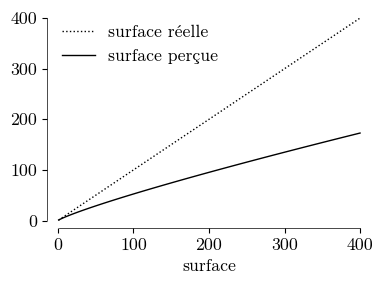

In [2]:
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
# a = np.linspace(1, 200, 100)
r = np.linspace(1, 20)
a = r**2
ax.plot(a, a, 'k:', label='surface réelle')
ax.plot(a, a**0.86, 'k', label='surface perçue')
ax.legend()
ax.set_xlabel('surface')
data_lim(ax)
breathe(ax)
plt.show()

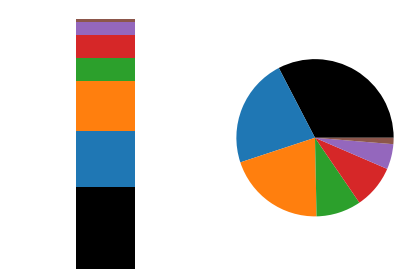

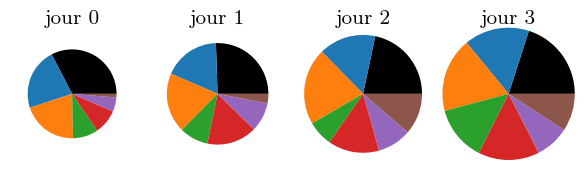

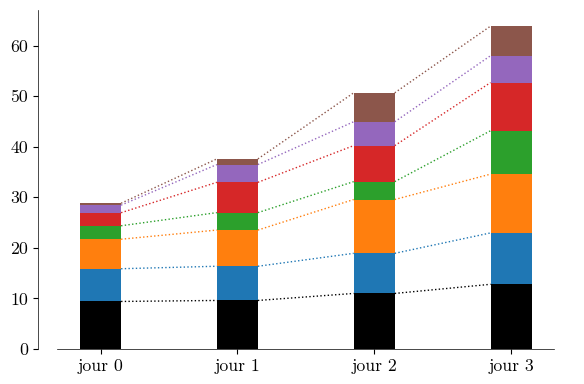

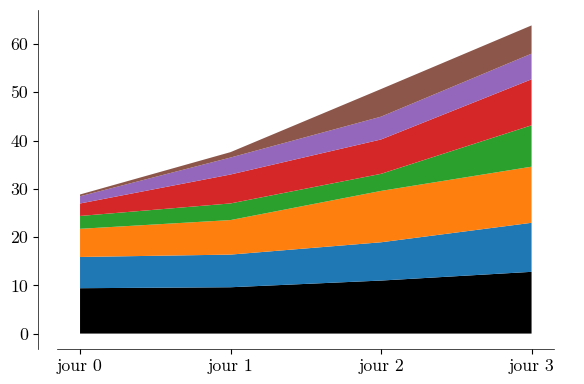

In [102]:
np.random.seed(0)
x = np.empty((4, 7))
x[0, :] = np.sort(np.random.lognormal(size=7))[::-1]
for idx in range(1, x.shape[0]):
	x[idx, :] = x[idx-1, :] + np.abs(np.random.normal(loc=0.5, scale=2, size=7))

plt.close('all')
fig, ax = plt.subplots(ncols=2)
for idx in range(len(x[0])):
	ax[0].bar([0], [x[0, idx]], 0.3, bottom=sum(x[0, :idx]))
ax[0].set_xlim((-0.5, 0.5))
ax[0].axis('off')
ax[1].pie(x[0])
plt.show()

plt.close('all')
fig, ax = plt.subplots(ncols=x.shape[0], dpi=100, facecolor='white')
for idx in range(x.shape[0]):
	ax[idx].pie(x[idx], radius=np.sqrt(x[idx].sum())/6)
	ax[idx].set_title(f'jour {idx}')
plt.show()

plt.close('all')
fig, ax = plt.subplots(dpi=100)
bars = []
for idc in range(x.shape[1]):
	bars.append(ax.bar(np.arange(x.shape[0]), x[:, idc], 0.3, bottom=[sum(x_[:idc]) for x_ in x]))
for bar in bars:
	for idx in range(len(bar.patches)-1):
		r1, r2 = bar.patches[idx], bar.patches[idx+1]
		b1, b2 = r1.get_bbox(), r2.get_bbox()
		ax.plot(
			[b1.xmax, b2.xmin], [b1.ymax, b2.ymax],
			linestyle='dotted',
			color=r1.get_facecolor()
		)
ax.set_xticks(np.arange(x.shape[0]))
ax.set_xticklabels([f'jour {i}' for i in np.arange(x.shape[0])])
breathe(ax, 'x')
plt.show()

plt.close('all')
fig, ax = plt.subplots(dpi=100)
for idc in range(x.shape[1]):
	ax.fill_between(
		np.arange(x.shape[0]),
		np.sum(x[:, :idc], axis=1) if idc > 0 else np.zeros_like(x[:, idc]),
		np.sum(x[:, :idc+1], axis=1)
	)
ax.set_xticks(np.arange(x.shape[0]))
ax.set_xticklabels([f'jour {i}' for i in np.arange(x.shape[0])])
breathe(ax, 'x')
plt.show()